In [1]:
# импортируем все нужные нам библиотеки
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import xlwings as xw
#%matplotlib inline # данная строчка нужна для корректного отображения графиков

**Импортируем данные по дейсвующим клиентам**

In [2]:
filename = r"C:\Users\79082\Downloads\deystvuyuschie_12_02_ф.xlsx"
password = "Qwerty159753"
wb = xw.Book(filename, password=password)
sheet = wb.sheets[0]
df_d = sheet.used_range.options(pd.DataFrame, header=True, index=False).value # импортируем датасет по децствующим клиентам
df_d.head(5) 

,Краткое наименование клиента,ОКПО,ОГРН,Вид контрагента,Действующий/Потенциальный клиент,ОКВЭД2 (вид деятельности),Размер компании,Объем перевозок тыс.тонн за год,Провозная плата за перевозку тыс.руб за год,Плата за дополнительные услуги тыс.руб за год,...,Признак МСП Да/Нет,Средняя численность работников,Размер уставного капитала объявленный,Средняя численность работников (окончательно),Объем перевозок альтернативными видами транспорта,Размер компании(3 категории),выручка (в млн руб) по формуле,выручка из интернета,чистая прибыль (в млн руб) по формуле,чистая прибыль из интернета
0,"OOO ""КАРНЕТ""",55745980,1223600003263.0,Юридическое лицо,действующий,Деятельность автомобильного грузового транспорта,Микробизнес,184.0,21318.0,643.0,...,да,NaN,10000.0,96.0,None,Малый бизнес,453.00,NaN,112.00,NaN
1,"АКБ ""МОСТРАНСБАНК"" ОАО",17515524,1027739075407.0,Юридическое лицо,действующий,Денежное посредничество прочее,Крупный бизнес,1538.0,170860.0,29687.0,...,нет,NaN,149126460.0,4993.0,None,Крупный бизнес,5145.00,NaN,1074.00,NaN
2,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""БУРЕВЕСТНИК-XXI""",52680665,1027739744273.0,Юридическое лицо,действующий,Аренда и управление собственным или арендованн...,Малый бизнес,89.0,36948.0,705.0,...,да,19.0,7009910.0,71.0,None,Малый бизнес,570.31,570.31,487.45,487.45
3,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""КОНЦЕРН ПРАМО""",59157079,1027718012300.0,Юридическое лицо,действующий,Деятельность по предоставлению прочих вспомога...,Средний бизнес,468.0,89755.0,8108.0,...,да,17.0,195000000.0,1060.0,None,Средний бизнес,1061.00,NaN,582.00,NaN
4,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""МИЭЛЬ-ЗН""",76624424,1057746637630.0,Юридическое лицо,действующий,Управление недвижимым имуществом за вознагражд...,Микробизнес,118.0,40661.0,1757.0,...,да,1.0,20000.0,207.0,None,Малый бизнес,456.00,NaN,131.00,NaN


In [3]:
df_d.info() # смотрим общую информацию 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6023 entries, 0 to 6022
Data columns (total 22 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Краткое наименование клиента                       377 non-null    object 
 1   ОКПО                                               343 non-null    object 
 2   ОГРН                                               377 non-null    object 
 3   Вид контрагента                                    377 non-null    object 
 4   Действующий/Потенциальный клиент                   377 non-null    object 
 5   ОКВЭД2 (вид деятельности)                          377 non-null    object 
 6   Размер компании                                    377 non-null    object 
 7   Объем перевозок тыс.тонн за год                    377 non-null    float64
 8   Провозная плата за перевозку тыс.руб за год        377 non-null    float64
 9   Плата за

In [4]:
df_d.dropna( how='all', inplace=True) # удаляем полностью пустые строки

In [5]:
# удаляем колонки, которые нам в принципе вообще не нужны
df_d = df_d.drop(columns=['Средняя численность работников'])
df_d = df_d.drop(columns=['Объем перевозок альтернативными видами транспорта'])
df_d = df_d.drop(columns=['выручка из интернета'])
df_d = df_d.drop(columns=['чистая прибыль из интернета'])
df_d=df_d.drop(columns='Совместные проекты с компанией (Да/Нет)')
df_d=df_d.drop(columns='Признак МСП Да/Нет')

In [6]:
df_d.describe() # видим, что в колонке Средняя численность работников (окончательно) мин значение 0, есть нули, надо их заменить

,Объем перевозок тыс.тонн за год,Провозная плата за перевозку тыс.руб за год,Плата за дополнительные услуги тыс.руб за год,Лояльность клиента к компании (от 0 до 10 баллов),Размер уставного капитала объявленный,Средняя численность работников (окончательно),выручка (в млн руб) по формуле,чистая прибыль (в млн руб) по формуле
count,377.000000,377.000000,377.000000,377.000000,3.770000e+02,377.000000,377.000000,377.000000
mean,287.071618,57026.283820,5273.103448,6.628647,7.955304e+07,685.737401,1028.389629,323.287878
std,447.040181,55069.950987,9531.922659,1.328904,7.545362e+08,1255.104121,1546.088441,317.384927
min,1.000000,220.000000,7.000000,6.000000,8.400000e+03,0.000000,110.070000,-318.240000
25%,59.000000,22312.000000,533.000000,6.000000,1.000000e+04,82.000000,360.000000,146.000000
50%,124.000000,39024.000000,1059.000000,6.000000,3.000000e+04,133.000000,430.000000,209.000000
75%,189.000000,56866.000000,2072.000000,6.000000,1.310000e+06,202.000000,490.000000,267.000000
max,1949.000000,199202.000000,35352.000000,10.000000,1.000000e+10,4993.000000,7120.000000,1191.000000


In [7]:
df_d.loc[(df_d['Средняя численность работников (окончательно)']==0) & ((df_d['Размер компании(3 категории)']=='Малый бизнес')|(df_d['Размер компании(3 категории)']=='Микробизнес')),'Средняя численность работников (окончательно)']=50 # заменяем нули на среднее значение по столбцу
df_d.loc[(df_d['Средняя численность работников (окончательно)']==0) & (df_d['Размер компании(3 категории)']=='Средний бизнес'),'Средняя численность работников (окончательно)']=50 # заменяем нули на среднее значение по столбцу

In [8]:
df_d=df_d.drop(columns='Размер компании(3 категории)')

In [9]:
col_d=[ 'Объем перевозок тыс.тонн за год','Провозная плата за перевозку тыс.руб за год', 'Плата за дополнительные услуги тыс.руб за год','Средняя численность работников (окончательно)','Лояльность клиента к компании (от 0 до 10 баллов)','выручка (в млн руб) по формуле','чистая прибыль (в млн руб) по формуле'] # вещественные признаки 

In [10]:
df_d[col_d].corr() # посмотрим на парные корреляции

,Объем перевозок тыс.тонн за год,Провозная плата за перевозку тыс.руб за год,Плата за дополнительные услуги тыс.руб за год,Средняя численность работников (окончательно),Лояльность клиента к компании (от 0 до 10 баллов),выручка (в млн руб) по формуле,чистая прибыль (в млн руб) по формуле
Объем перевозок тыс.тонн за год,1.000000,0.865648,0.907145,0.883506,0.893945,0.809564,0.840320
Провозная плата за перевозку тыс.руб за год,0.865648,1.000000,0.949090,0.919305,0.942260,0.864289,0.852144
Плата за дополнительные услуги тыс.руб за год,0.907145,0.949090,1.000000,0.955978,0.954959,0.895943,0.867146
Средняя численность работников (окончательно),0.883506,0.919305,0.955978,1.000000,0.948905,0.854944,0.875034
Лояльность клиента к компании (от 0 до 10 баллов),0.893945,0.942260,0.954959,0.948905,1.000000,0.907653,0.890758
выручка (в млн руб) по формуле,0.809564,0.864289,0.895943,0.854944,0.907653,1.000000,0.834155
чистая прибыль (в млн руб) по формуле,0.840320,0.852144,0.867146,0.875034,0.890758,0.834155,1.000000


**Кластерезуем действующих клиентов по параметрам**

In [11]:
col_d=[ 'Объем перевозок тыс.тонн за год','Лояльность клиента к компании (от 0 до 10 баллов)','Плата за дополнительные услуги тыс.руб за год','Провозная плата за перевозку тыс.руб за год','Средняя численность работников (окончательно)','выручка (в млн руб) по формуле','чистая прибыль (в млн руб) по формуле'] 

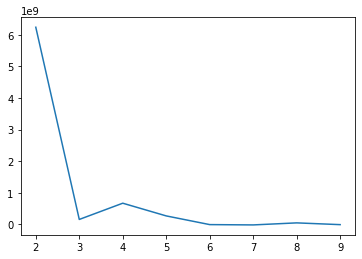

In [12]:
# метод локтя
from scipy.cluster.hierarchy import *

from scipy.spatial.distance import pdist #импортируем функцию для вычисления расстояния

df_clust_d = pd.DataFrame(columns=col_d)
df_clust_d['Объем перевозок тыс.тонн за год']=df_d['Объем перевозок тыс.тонн за год']
df_clust_d['Плата за дополнительные услуги тыс.руб за год']=df_d['Плата за дополнительные услуги тыс.руб за год']
df_clust_d['Провозная плата за перевозку тыс.руб за год']=df_d['Провозная плата за перевозку тыс.руб за год']
df_clust_d['Средняя численность работников (окончательно)']=df_d['Средняя численность работников (окончательно)']
df_clust_d['Размер уставного капитала объявленный']=df_d['Размер уставного капитала объявленный']
df_clust_d['выручка (в млн руб) по формуле']=df_d['выручка (в млн руб) по формуле']
df_clust_d['Лояльность клиента к компании (от 0 до 10 баллов)']=df_d['Лояльность клиента к компании (от 0 до 10 баллов)']
df_clust_d['чистая прибыль (в млн руб) по формуле']=df_d['чистая прибыль (в млн руб) по формуле']


data_dist = pdist(df_clust_d, 'euclidean') #вычисляем евклидово расстояние
data_linkage = linkage(data_dist, method='average')
last = data_linkage[-10:, 2] 
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)

#используем метод локтя для вычисления оптимального числа кластеров

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()

C:\Users\79082\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\79082\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


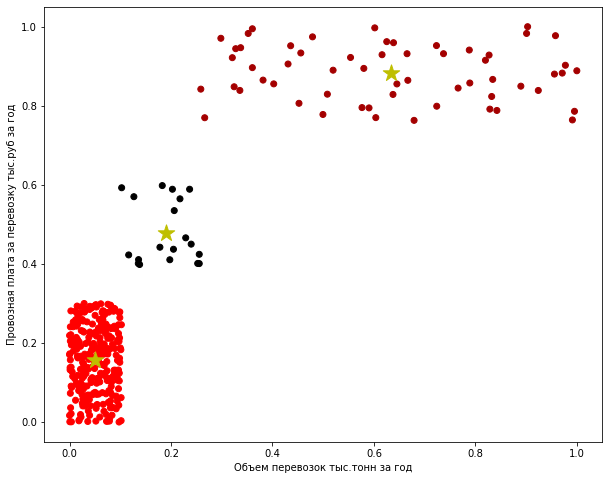

In [13]:
# загружаем библиотеку препроцесинга данных
# эта библиотека автоматически приведет данные к нормальным значениям
from sklearn import preprocessing
dataNorm_d = preprocessing.MinMaxScaler().fit_transform(df_d[col_d].values) # нормализуем данные

df_d_numpy = dataNorm_d[np.isfinite(dataNorm_d).all(1)] # формируем массив numpy
nClust=3 #ставим 3 т.к. в принципе кластеров и должно быть 3(малый, средний, крупный)
km_d = KMeans(n_clusters=nClust,random_state=1).fit(df_d_numpy) # обучаем модель
km_d.labels_ 
  
#визуализируем
x=0 
y=3
centroids = km_d.cluster_centers_
plt.figure(figsize=(10, 8))
plt.scatter(df_d_numpy[:,x], df_d_numpy[:,y], c=km_d.labels_, cmap='flag')
plt.scatter(centroids[:, x], centroids[:, y], marker='*', s=300,
        c='y', label='centroid')
plt.xlabel(col_d[x])
plt.ylabel(col_d[y]);
plt.show()

**Строим 3D модель кластеризации по действующим клиентам**

In [14]:
labels_d=km_d.labels_
df_d['Кластер']=km_d.labels_ # добавляем колонку с номерами кластеров в исходный датасет

<ipython-input-15-c14efb8f21a8>:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(X[:,0],X[:,1],X[:,7],c=labels.astype(np.float))


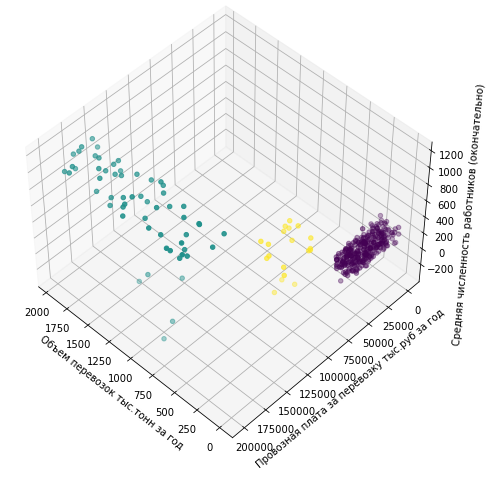

In [15]:
# строим трехмерный график 
from mpl_toolkits.mplot3d import Axes3D
X=df_d.values[:,7:26]
fig=plt.figure(1,figsize=(8,6))
plt.clf()
ax=Axes3D(fig,rect=[0,0,.95,1],elev=48,azim=134)

ax.set_xlabel('Объем перевозок тыс.тонн за год')
ax.set_ylabel('Провозная плата за перевозку тыс.руб за год')
ax.set_zlabel('Средняя численность работников (окончательно)')
labels=km_d.labels_  
ax.scatter(X[:,0],X[:,1],X[:,7],c=labels.astype(np.float))

По признакам, которые есть и у дествующих клиентов, и у потенциальных строим таблицу describe, группируем по кластерам

In [16]:
col_d=['выручка (в млн руб) по формуле','Средняя численность работников (окончательно)']

In [17]:
res_d=df_d.groupby('Кластер')[col_d].describe().apply(lambda s: s.apply('{0:.3f}'.format))
res_d

выручка (в млн руб) по формуле                                         \
                                 count      mean       std      min       25%   
Кластер                                                                         
0                              300.000   399.243    62.818  110.070   347.000   
1                               58.000  4306.431  1649.935  792.150  3071.750   
2                               19.000   955.629   138.650  446.540   916.000   

                                       \
              50%       75%       max   
Кластер                                 
0         398.500   449.000   570.310   
1        4599.000  5741.500  7120.000   
2         962.000  1028.205  1090.000   

        Средняя численность работников (окончательно)                     \
                                                count      mean      std   
Кластер                                                                    
0                                             300.000   111.227   59.231   
1                                              58.000  3450.328  836.819   
2                                              19.000  1320.316  270.380   

                                                           
              min       25%       50%       75%       max  
Кластер                                                    
0           1.000    69.000   114.000   160.250   211.000  
1        2235.000  2795.000  3234.500  4171.250  4993.000  
2        1017.000  1103.000  1190.000  1609.500  1817.000

**Импортируем данные по потенциальным клиентам**

In [18]:
df_p=pd.read_excel('potentsialnye_12_02_ф.xlsx') # импортируем датасет по децствующим клиентам
df_p.tail(10) 

,Краткое наименование клиента,ОКПО,ОГРН,Вид контрагента,Действующий/Потенциальный клиент,ОКВЭД2 (вид деятельности),Размер компании,Объем перевозок тыс.тонн за год,Провозная плата за перевозку тыс.руб за год,Плата за дополнительные услуги тыс.руб за год,...,Признак МСП Да/Нет,Средняя численность работников,Размер уставного капитала объявленный,Средняя численность работников (окончательно),Объем перевозок альтернативными видами транспорта,Размер компании(3 категории),выручка (в млн руб) по формуле,выручка из интернета,чистая прибыль (в млн руб) по формуле,чистая прибыль из интернета
363,"ООО ""ТНК""",NaN,1217700346786,Юридическое лицо,потенциальный,"Торговля оптовая твердым, жидким и газообразны...",Крупный бизнес,789,152733,18956,...,нет,1.0,10000,2972,NaN,Крупный бизнес,3300,NaN,1000,NaN
364,"ООО ""ТОП СЕРВИС""",93327969.0,1067746247700,Юридическое лицо,потенциальный,Торговля оптовая неспециализированная,Крупный бизнес,737,186407,34498,...,нет,NaN,50000000,3604,NaN,Крупный бизнес,6311,NaN,1048,NaN
365,"ООО ""ФИЛИ ГРАД""",42779842.0,1197746741367,Юридическое лицо,потенциальный,Строительство жилых и нежилых зданий,Средний бизнес,370,82345,7651,...,да,1.0,10000,1500,NaN,Средний бизнес,1002,NaN,653,NaN
366,"ООО ""ТРАЙДЕНТ""",90568767.0,1117746142458,Юридическое лицо,потенциальный,Торговля оптовая прочими машинами и оборудованием,Крупный бизнес,1673,168615,22870,...,нет,NaN,10000,4098,NaN,Крупный бизнес,4428,NaN,939,NaN
367,"ООО ""ТРАНСАТЛАНТИК ЭРУЭЙЗ""",17088542.0,1037739532027,Юридическое лицо,потенциальный,"Деятельность вспомогательная прочая, связанная...",Крупный бизнес,1493,163541,23642,...,нет,3.0,115200,4038,NaN,Крупный бизнес,5331,NaN,958,NaN
368,"ООО ""ТРАНСКОМ""",73842965.0,1047796567356,Юридическое лицо,потенциальный,Деятельность автомобильного грузового транспор...,Крупный бизнес,1158,158355,22705,...,нет,NaN,10000,4042,NaN,Крупный бизнес,6460,NaN,1025,NaN
369,"ООО ""ТРИО КЛИМАТ""",89518936.0,5087746539403,Юридическое лицо,потенциальный,Торговля оптовая неспециализированная,Крупный бизнес,774,176929,32654,...,нет,68.0,10000,3923,NaN,Крупный бизнес,5721,NaN,1021,NaN
370,"ООО ""ЭНКИ КОНСТРАКШН""",28111327.0,1185024006870,Юридическое лицо,потенциальный,Строительство жилых и нежилых зданий,Средний бизнес,367,89627,7567,...,да,35.0,3125000,1143,NaN,Средний бизнес,901,NaN,672,NaN
371,"ООО ""ТТЖД""",18213682.0,1155032013531,Юридическое лицо,потенциальный,Строительство автомобильных дорог и автомагист...,Крупный бизнес,781,190825,29945,...,нет,1.0,10000,4781,NaN,Крупный бизнес,6865,NaN,913,NaN
372,"ООО ""ЮНИДРАФТ""",28940414.0,1147746140090,Юридическое лицо,потенциальный,"Деятельность в области архитектуры, инженерных...",Средний бизнес,452,89556,7779,...,да,168.0,10000,1492,NaN,Средний бизнес,1045,NaN,409,NaN


In [20]:
df_p.info() # смотрим общую информацию 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 22 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Краткое наименование клиента                       373 non-null    object 
 1   ОКПО                                               130 non-null    float64
 2   ОГРН                                               373 non-null    int64  
 3   Вид контрагента                                    373 non-null    object 
 4   Действующий/Потенциальный клиент                   373 non-null    object 
 5   ОКВЭД2 (вид деятельности)                          373 non-null    object 
 6   Размер компании                                    373 non-null    object 
 7   Объем перевозок тыс.тонн за год                    373 non-null    int64  
 8   Провозная плата за перевозку тыс.руб за год        373 non-null    int64  
 9   Плата за д

In [21]:
df_p['Средняя численность работников']
# удаляем колонки, которые нам в принципе вообще не нужны
df_p = df_p.drop(columns=['Средняя численность работников'])
df_p = df_p.drop(columns=['Объем перевозок альтернативными видами транспорта'])
df_p = df_p.drop(columns=['выручка из интернета'])
df_p = df_p.drop(columns=['чистая прибыль из интернета'])
df_p=df_p.drop(columns='Совместные проекты с компанией (Да/Нет)')
df_p=df_p.drop(columns='Признак МСП Да/Нет')

In [22]:
df_p.dropna( how='all', inplace=True) # удаляем полностью пустые строки

In [23]:
df_p.loc[df_p['Средняя численность работников (окончательно)']==0,'Средняя численность работников (окончательно)']=51 # заменяем нули на среднее значение по столбцу

In [24]:
df_p=df_p.drop(columns='Размер компании(3 категории)')

**Кластерезуем потенциальных клиентов по параметрам**

In [25]:
col_p=['Средняя численность работников (окончательно)','выручка (в млн руб) по формуле','чистая прибыль (в млн руб) по формуле'] 

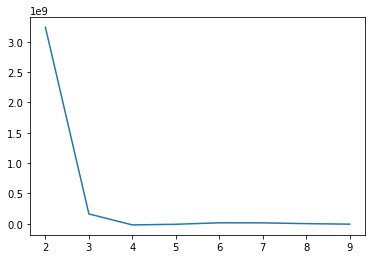

In [26]:
df_clust_p = pd.DataFrame(columns=col_p)

df_clust_p['Размер уставного капитала объявленный']=df_p['Размер уставного капитала объявленный']
df_clust_p['Средняя численность работников (окончательно)']=df_p['Средняя численность работников (окончательно)']
df_clust_p['чистая прибыль (в млн руб) по формуле']=df_p['чистая прибыль (в млн руб) по формуле']
df_clust_p['выручка (в млн руб) по формуле']=df_p['выручка (в млн руб) по формуле']


data_dist = pdist(df_clust_p, 'euclidean') #вычисляем евклидово расстояние
data_linkage = linkage(data_dist, method='average')
last = data_linkage[-10:, 2] 
last_rev = last[::-1]
# idxs = np.arange(1, len(last) + 1)
# plt.plot(idxs, last_rev)

#используем метод локтя для вычисления оптимального числа кластеров

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
# k = acceleration_rev.argmax() + 2 
# print("Рекомендованное количество кластеров:", k)

In [27]:
from sklearn import preprocessing
model = preprocessing.MinMaxScaler().fit(df_p[col_p].values)# нормализуем данные
dataNorm_p = model.transform(df_p[col_p].values)

df_p_numpy = dataNorm_p[np.isfinite(dataNorm_p).all(1)] # формируем массив numpy


C:\Users\79082\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\79082\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


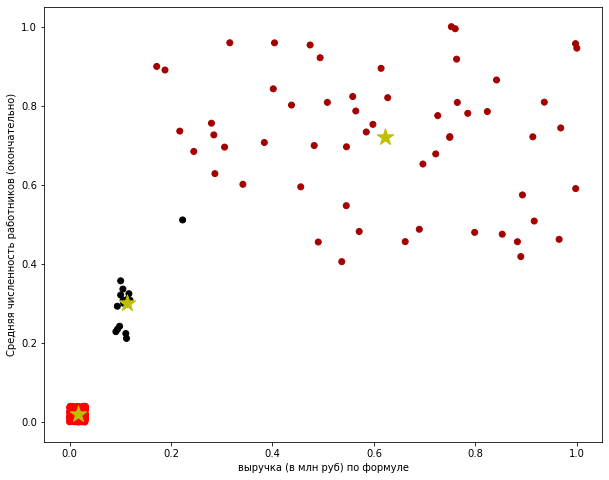

In [28]:
nClust=3#ставим 3 т.к. в принципе кластеров и должно быть 3(малый, средний, крупный)
km_p = KMeans(n_clusters=nClust,random_state=1).fit(df_p_numpy) # обучаем модель
km_p.labels_
 
#визуализируем
x=1
y=0
centroids = km_p.cluster_centers_
plt.figure(figsize=(10, 8))
plt.scatter(df_p_numpy[:,x], df_p_numpy[:,y], c=km_p.labels_, cmap='flag')
plt.scatter(centroids[:, x], centroids[:, y], marker='*', s=300,
        c='y', label='centroid')
plt.xlabel(col_p[x])
plt.ylabel(col_p[y]);
plt.show()

**Строим 3D модель кластеризации по потенциальным клиентам**

In [29]:
labels_p=km_p.labels_
df_p['Кластер']=km_p.labels_ # добавляем колонку с номерами кластеров в исходный датасет

<ipython-input-30-7459cad44b08>:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(X[:,0],X[:,2],X[:,1],c=labels.astype(np.float))


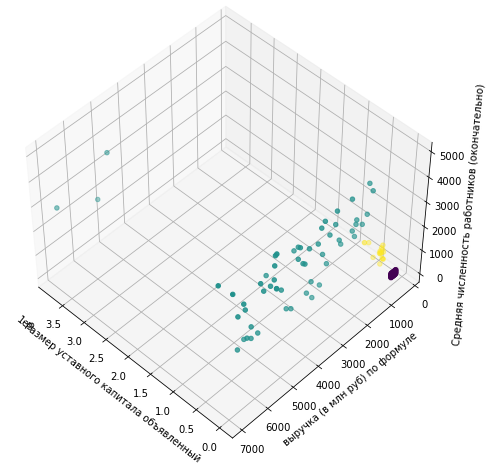

In [30]:
# строим трехмерный график 
from mpl_toolkits.mplot3d import Axes3D
X=df_p.values[:,11:]
fig=plt.figure(1,figsize=(8,6))
plt.clf()
ax=Axes3D(fig,rect=[0,0,.95,1],elev=48,azim=134)

ax.set_xlabel('Размер уставного капитала объявленный')
ax.set_ylabel('выручка (в млн руб) по формуле')
ax.set_zlabel('Средняя численность работников (окончательно)')
labels=km_p.labels_  
ax.scatter(X[:,0],X[:,2],X[:,1],c=labels.astype(np.float))

In [31]:
labels_p=km_p.labels_

In [32]:
df_p['Кластер']=km_p.labels_

In [33]:
from sklearn.metrics import silhouette_score

print(silhouette_score(df_p_numpy, km_p.labels_, metric='euclidean'))

0.8060912845344976


По признакам, которые есть и у дествующих клиентов, и у потенциальных строим таблицу describe, группируем по кластерам

In [34]:
col_p=['выручка (в млн руб) по формуле','Средняя численность работников (окончательно)']

In [35]:
res_p=df_p.groupby('Кластер')[col_p].describe().apply(lambda s: s.apply('{0:.3f}'.format))
res_p

выручка (в млн руб) по формуле                                \
                                 count      mean       std       min   
Кластер                                                                
0                              300.000   404.430    61.898   300.000   
1                               57.000  4388.702  1556.866  1431.000   
2                               16.000  1043.438   200.817   901.000   

                                                 \
              25%       50%       75%       max   
Кластер                                           
0         356.000   396.000   464.250   508.000   
1        3300.000  4342.000  5556.000  6882.000   
2         959.500   999.000  1046.750  1767.000   

        Средняя численность работников (окончательно)                     \
                                                count      mean      std   
Кластер                                                                    
0                                             300.000   100.397   56.499   
1                                              57.000  3597.649  833.944   
2                                              16.000  1502.375  357.453   

                                                           
              min       25%       50%       75%       max  
Кластер                                                    
0           1.000    51.750    97.500   150.000   200.000  
1        2027.000  2972.000  3665.000  4113.000  4995.000  
2        1057.000  1201.750  1519.000  1609.250  2554.000

## Сравнение

In [36]:
res_d # Действующие

выручка (в млн руб) по формуле                                         \
                                 count      mean       std      min       25%   
Кластер                                                                         
0                              300.000   399.243    62.818  110.070   347.000   
1                               58.000  4306.431  1649.935  792.150  3071.750   
2                               19.000   955.629   138.650  446.540   916.000   

                                       \
              50%       75%       max   
Кластер                                 
0         398.500   449.000   570.310   
1        4599.000  5741.500  7120.000   
2         962.000  1028.205  1090.000   

        Средняя численность работников (окончательно)                     \
                                                count      mean      std   
Кластер                                                                    
0                                             300.000   111.227   59.231   
1                                              58.000  3450.328  836.819   
2                                              19.000  1320.316  270.380   

                                                           
              min       25%       50%       75%       max  
Кластер                                                    
0           1.000    69.000   114.000   160.250   211.000  
1        2235.000  2795.000  3234.500  4171.250  4993.000  
2        1017.000  1103.000  1190.000  1609.500  1817.000

In [37]:
res_p # Потенциальные

выручка (в млн руб) по формуле                                \
                                 count      mean       std       min   
Кластер                                                                
0                              300.000   404.430    61.898   300.000   
1                               57.000  4388.702  1556.866  1431.000   
2                               16.000  1043.438   200.817   901.000   

                                                 \
              25%       50%       75%       max   
Кластер                                           
0         356.000   396.000   464.250   508.000   
1        3300.000  4342.000  5556.000  6882.000   
2         959.500   999.000  1046.750  1767.000   

        Средняя численность работников (окончательно)                     \
                                                count      mean      std   
Кластер                                                                    
0                                             300.000   100.397   56.499   
1                                              57.000  3597.649  833.944   
2                                              16.000  1502.375  357.453   

                                                           
              min       25%       50%       75%       max  
Кластер                                                    
0           1.000    51.750    97.500   150.000   200.000  
1        2027.000  2972.000  3665.000  4113.000  4995.000  
2        1057.000  1201.750  1519.000  1609.250  2554.000

In [38]:
res_d = res_d.astype (float)
res_p = res_p.astype (float)

In [39]:
res= res_d.append(res_p, ignore_index = True )
res

выручка (в млн руб) по формуле                                        \
                           count      mean       std      min      25%   
0                          300.0   399.243    62.818   110.07   347.00   
1                           58.0  4306.431  1649.935   792.15  3071.75   
2                           19.0   955.629   138.650   446.54   916.00   
3                          300.0   404.430    61.898   300.00   356.00   
4                           57.0  4388.702  1556.866  1431.00  3300.00   
5                           16.0  1043.438   200.817   901.00   959.50   

                             Средняя численность работников (окончательно)  \
      50%       75%      max                                         count   
0   398.5   449.000   570.31                                         300.0   
1  4599.0  5741.500  7120.00                                          58.0   
2   962.0  1028.205  1090.00                                          19.0   
3   396.0   464.250   508.00                                         300.0   
4  4342.0  5556.000  6882.00                                          57.0   
5   999.0  1046.750  1767.00                                          16.0   

                                                                
       mean      std     min      25%     50%      75%     max  
0   111.227   59.231     1.0    69.00   114.0   160.25   211.0  
1  3450.328  836.819  2235.0  2795.00  3234.5  4171.25  4993.0  
2  1320.316  270.380  1017.0  1103.00  1190.0  1609.50  1817.0  
3   100.397   56.499     1.0    51.75    97.5   150.00   200.0  
4  3597.649  833.944  2027.0  2972.00  3665.0  4113.00  4995.0  
5  1502.375  357.453  1057.0  1201.75  1519.0  1609.25  2554.0

# Оценка качества кластеризации на основе схожести кластеров действующих и потенциальных клиентов между собой

C:\Users\79082\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\79082\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\79082\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\79082\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 

[Text(0.5, 0, 'Q 75'), Text(0, 0.5, 'Среднее значение')]

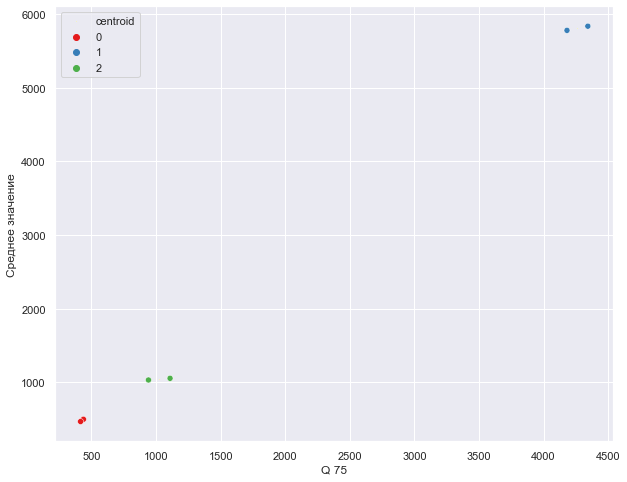

In [40]:
# по выручке
import seaborn as sns

labels=[0,1,2,0,1,2]

res_v=np.array(res.iloc[:,8:])

res_v=np.array([[437.700,79.022,110.07,376.75,442.0,499.00,570.31,0],
 [4181.655,1872.846,792.15,2460.75,4114.5,5780.75,7120.00,2],
 [941.208,141.925,446.54,907.50,973.0,1032.50,1090.00,1],
 [415.423,59.861,300.00,367.00,424.0,468.25,507.00,0],
 [4343.120,1658.471,1427.00,3043.00,4110.5,5837.75,7114.00,2],
 [1108.308,343.118,937.00,998.00,1023.0,1055.00,2242.00,1]])

# загружаем библиотеку препроцесинга данных
# эта библиотека автоматически приведет данные к нормальным значениям
# from sklearn import preprocessing
# dataNorm_workers = preprocessing.MinMaxScaler().fit_transform(res_workers) # нормализуем данные
df_v_numpy = res_v[np.isfinite(res_v).all(1)] # формируем массив numpy

nClust=3#ставим 3 т.к. в принципе кластеров и должно быть 3(малый, средний, крупный)
km_res = KMeans(n_clusters=nClust).fit(df_v_numpy) # обучаем модель
km_res.labels_

# #визуализируем
x=0 
y=5
centroids = km_res.cluster_centers_
sns.set(rc={"figure.figsize":(10, 8)}) 
sns.scatterplot(centroids[:, x], centroids[:, y], marker='*', s=1,
        color='yellow', label='centroid')

graf_v=sns.scatterplot(df_v_numpy[:,x], df_v_numpy[:,y], hue=labels, legend='full',palette="Set1")
graf_v.set(xlabel ="Q 75", ylabel = "Среднее значение")

C:\Users\79082\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\79082\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Component 1'), Text(0, 0.5, 'Component 2')]

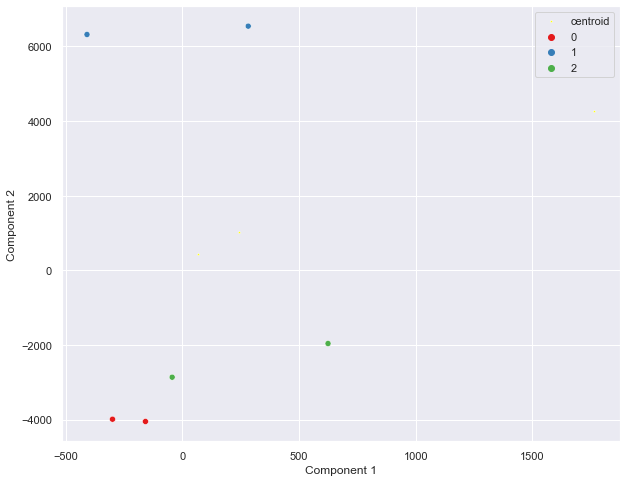

In [41]:
# Импорт библиотек
from sklearn.decomposition import PCA

 # Обучаем PCA для выделения 6 признаков
pca = PCA(n_components=2)
pca.fit(df_v_numpy)
 # Изменяем наши наборы данных под выбранные признаки
df_v_numpy_pca = pca.transform(df_v_numpy)

#визуализируем
x=1
y=0
centroids = km_res.cluster_centers_
sns.set(rc={"figure.figsize":(10, 8)}) 
sns.scatterplot(centroids[:, x], centroids[:, y], marker='*', s=10,
        color='yellow', label='centroid')

graf_v=sns.scatterplot(df_v_numpy_pca[:,x], df_v_numpy_pca[:,y], hue=labels, legend='full',palette="Set1")
graf_v.set(xlabel ="Component 1", ylabel = "Component 2")

In [42]:
res

выручка (в млн руб) по формуле                                        \
                           count      mean       std      min      25%   
0                          300.0   399.243    62.818   110.07   347.00   
1                           58.0  4306.431  1649.935   792.15  3071.75   
2                           19.0   955.629   138.650   446.54   916.00   
3                          300.0   404.430    61.898   300.00   356.00   
4                           57.0  4388.702  1556.866  1431.00  3300.00   
5                           16.0  1043.438   200.817   901.00   959.50   

                             Средняя численность работников (окончательно)  \
      50%       75%      max                                         count   
0   398.5   449.000   570.31                                         300.0   
1  4599.0  5741.500  7120.00                                          58.0   
2   962.0  1028.205  1090.00                                          19.0   
3   396.0   464.250   508.00                                         300.0   
4  4342.0  5556.000  6882.00                                          57.0   
5   999.0  1046.750  1767.00                                          16.0   

                                                                
       mean      std     min      25%     50%      75%     max  
0   111.227   59.231     1.0    69.00   114.0   160.25   211.0  
1  3450.328  836.819  2235.0  2795.00  3234.5  4171.25  4993.0  
2  1320.316  270.380  1017.0  1103.00  1190.0  1609.50  1817.0  
3   100.397   56.499     1.0    51.75    97.5   150.00   200.0  
4  3597.649  833.944  2027.0  2972.00  3665.0  4113.00  4995.0  
5  1502.375  357.453  1057.0  1201.75  1519.0  1609.25  2554.0

C:\Users\79082\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\79082\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\79082\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\79082\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 

[Text(0.5, 0, 'Мин'), Text(0, 0.5, 'Среднее значение')]

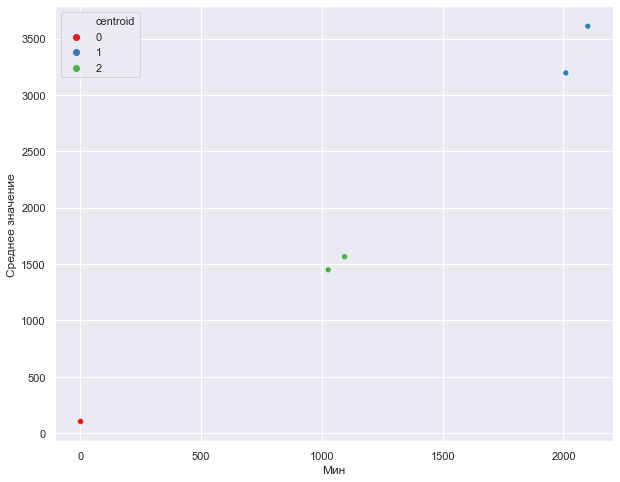

In [43]:
# по ср численности работников
labels=[0,1,2,0,1,2]

res_workers=np.array(res.iloc[:,8:])

res_workers=np.array([[105.633,60.445,1.0,58.00,100.5,157.00,209.0,0],
 [3609.845,827.725,2101.0,2962.00,3533.5,4353.25,4991.0,2],
 [1448.053,243.063,1026.0,1195.50,1485.0,1649.00,1764.0,1],
 [102.667,56.593,1.0,55.75,101.0,151.00,200.0,0],
 [3195.680,815.500,2010.0,2533.25,3083.0,3770.00,4963.0,2],
 [1564.385,290.550,1094.0,1446.00,1613.0,1717.00,2138.0,1]])

# загружаем библиотеку препроцесинга данных
# эта библиотека автоматически приведет данные к нормальным значениям
# from sklearn import preprocessing
# dataNorm_workers = preprocessing.MinMaxScaler().fit_transform(res_workers) # нормализуем данные
df_workers_numpy = res_workers[np.isfinite(res_workers).all(1)] # формируем массив numpy

nClust=3#ставим 3 т.к. в принципе кластеров и должно быть 3(малый, средний, крупный)
km_res = KMeans(n_clusters=nClust).fit(df_workers_numpy) # обучаем модель
km_res.labels_

#визуализируем
x=2 
y=0
centroids = km_res.cluster_centers_
sns.set(rc={"figure.figsize":(10, 8)}) 
sns.scatterplot(centroids[:, x], centroids[:, y], marker='*', s=1,
        color='yellow', label='centroid')

graf_workers=sns.scatterplot(df_workers_numpy[:,x], df_workers_numpy[:,y], hue=labels, legend='full',palette="Set1")
graf_workers.set(xlabel ="Мин", ylabel = "Среднее значение")

C:\Users\79082\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\79082\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Component 1'), Text(0, 0.5, 'Component 2')]

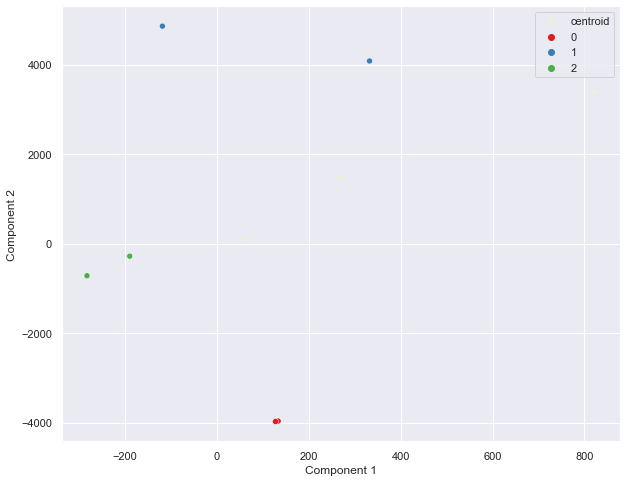

In [44]:
# Импорт библиотек
from sklearn.decomposition import PCA

 # Обучаем PCA для выделения 6 признаков
pca = PCA(n_components=2)
pca.fit(df_workers_numpy)
 # Изменяем наши наборы данных под выбранные признаки
df_workers_numpy_pca = pca.transform(df_workers_numpy)

#визуализируем
x=1
y=0
centroids = km_res.cluster_centers_
sns.set(rc={"figure.figsize":(10, 8)}) 
sns.scatterplot(centroids[:, x], centroids[:, y], marker='*', s=10,
        color='yellow', label='centroid')

graf_workers=sns.scatterplot(df_workers_numpy_pca[:,x], df_workers_numpy_pca[:,y], hue=labels, legend='full',palette="Set1")
graf_workers.set(xlabel ="Component 1", ylabel = "Component 2")